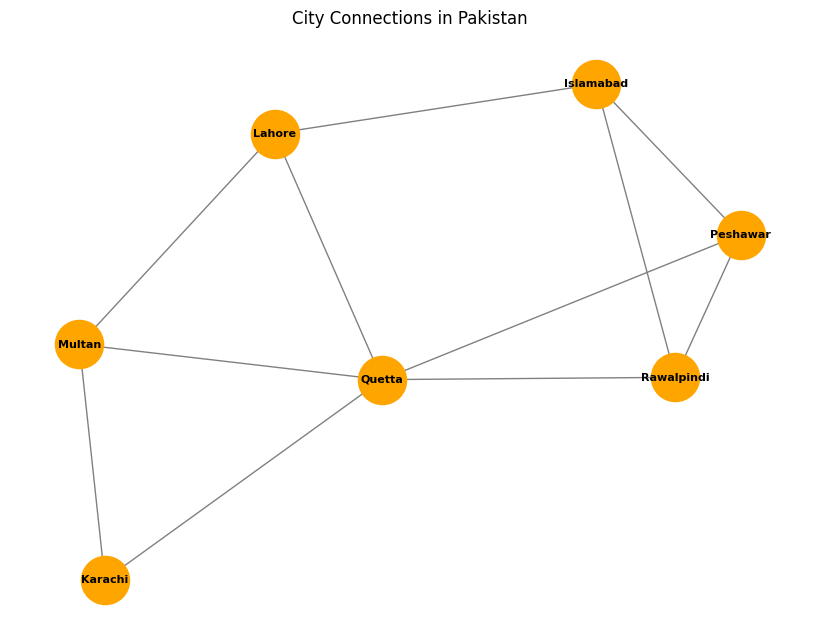


Shortest path from Islamabad to Karachi: ['Islamabad', 'Rawalpindi', 'Quetta', 'Karachi']


In [12]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

city_graph = {
    "Islamabad": ["Rawalpindi", "Lahore", "Peshawar"],
    "Rawalpindi": ["Islamabad", "Peshawar", "Quetta"],
    "Peshawar": ["Islamabad", "Rawalpindi", "Quetta"],
    "Lahore": ["Islamabad", "Multan", "Quetta"],
    "Multan": ["Lahore", "Karachi", "Quetta"],
    "Quetta": ["Rawalpindi", "Peshawar", "Multan", "Karachi"],
    "Karachi": ["Multan", "Quetta"]
}

def print_graph(graph):
    print("City Connections (Graph):")
    for city, neighbors in graph.items():
        print(f"{city} -> {', '.join(neighbors)}")

def bfs_shortest_path(start, destination):
    visited = set()
    queue = deque([(start, [start])])

    while queue:
        current_city, path = queue.popleft()

        if current_city == destination:
            return path

        if current_city not in visited:
            visited.add(current_city)
            for neighbor in city_graph[current_city]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

    return None

def visualize_graph(graph):
    G = nx.Graph()

    for city, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(city, neighbor)

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='orange', node_size=1200, font_size=8, font_weight='bold', edge_color='gray')
    plt.title("City Connections in Pakistan")
    plt.show()

visualize_graph(city_graph)

shortest_path = bfs_shortest_path("Islamabad", "Karachi")
print("\nShortest path from Islamabad to Karachi:", shortest_path)
